<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_02_Spreidingsmaten_Opgave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:PERU">Labo 02 Spreidingsmaten opgave</span>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

De dataset die in deze opdracht gebruikt wordt zal jullie (normaalgezien) bekend voorkomen. Het is dezelfde student dataset waar in de opdrachten rond centrummaten mee gewerkt werd. In onderstaande tabel kunnen julie toch nog eens de naam van de kolom en hun betekenis terugvinden.

| Variable Name |Description |
| --- | --- |
|school 	|student's school (binary; 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) |
|sex|	student's sex (binary: 'F' - female or 'M' - male)|
|age |	 student's age|
|address  |	student's home address type (binary: 'U' - urban or 'R' - rural)|
|famsize |	family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)|
|Pstatus |	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)|
|Medu  	|other's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)|
|Fedu |	ather's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher
|reason |	reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')|
|traveltime|	home to school travel time (numeric: 1 - 1 hour)|
|studytime	|weekly study time (numeric: 1 - 10 hours)|
|failures |	number of past class failures (numeric: n if 1<=n<3, else 4)|
|activities 	| extra-curricular activities (binary: yes or no)
|nursery  |	attended nursery school (binary: yes or no)|
|higher|	wants to take higher education (binary: yes or no)|
|internet |	Internet access at home (binary: yes or no)|
|romantic|	with a romantic relationship (binary: yes or no)|
|famrel |	quality of family relationships (numeric: from 1 - very bad to 5 - excellent)|
|freetime |	free time after school (numeric: from 1 - very low to 5 - very high)|
|goout |	going out with friends (numeric: from 1 - very low to 5 - very high)|
|Dalc |	workday alcohol consumption (numeric: from 1 - very low to 5 - very high)|
|Walc |	weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)|
|health |	current health status (numeric: from 1 - very bad to 5 - very good)|
|absences |	number of school absences|
|G1 |	first period grade (numeric: from 0 to 20)|
|G2  |	second period grade (numeric: from 0 to 20)|
|G3 |	final grade (numeric: from 0 to 20, output target)|

In [3]:
# Importeren van de dataset
df = pd.read_csv("Students.csv")

In [4]:
# toon de eerste 5 rijen
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,traveltime,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,course,2,2,0,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,course,1,2,0,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,other,1,2,3,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,home,1,3,0,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,home,1,2,0,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Hoeveel studenten zijn er in de dataset?

In [5]:
print(f" Het aantal rijen is : {df.shape[0]} ")

 Het aantal rijen is : 395 


Gebruik de describe-functie om een overzicht te bekomen van de variabelen in de dataset. Bevat de dataset ontbrekende waarden?

In [8]:
df.describe()
df.isnull().any()

,0
school,False
sex,False
age,False
address,False
famsize,False
Pstatus,False
Medu,False
Fedu,False
reason,False
traveltime,False


Wat is het maximum aantal afwezigheden van een student? Wat is de leeftijd van deze student?

In [9]:
voorwaarde = df['absences'] == df['absences'].max()
dataset_max_absences = df[voorwaarde]
print(f" De leeftijd van de student met max aantal afwezigheden is {dataset_max_absences.age.values[0]} jaar ")

 De leeftijd van de student met max aantal afwezigheden is 18 jaar 


Wat is de finale score van de oudste student?

In [12]:
voorwaarde_age = df['age'] == df['age'].max()
dataset_voorwaarde_leeftijd = df[voorwaarde_age]
print(f" De student met de leeftijd  {dataset_voorwaarde_leeftijd.age.values[0]} heeft deze finale score {dataset_voorwaarde_leeftijd.G3.values[0]}  ")

 De student met de leeftijd  22 heeft deze finale score 8  


Hoeveel vrije tijd had de student met de hoogste score?

In [13]:
voorwaarde_score = df['G3'] == df['G3'].max()
dataset_max_score = df[voorwaarde_score]
print(f" De student met de hoogste score heeft {dataset_max_score.freetime.values[0]} uur vrije tijd ")

 De student met de hoogste score heeft 2 uur vrije tijd 


Maak een histogram van het aantal studenten volgens hun finale score.

1.0063092108532552


Text(0.5, 1.0, 'Histogram studenten per finale score ')

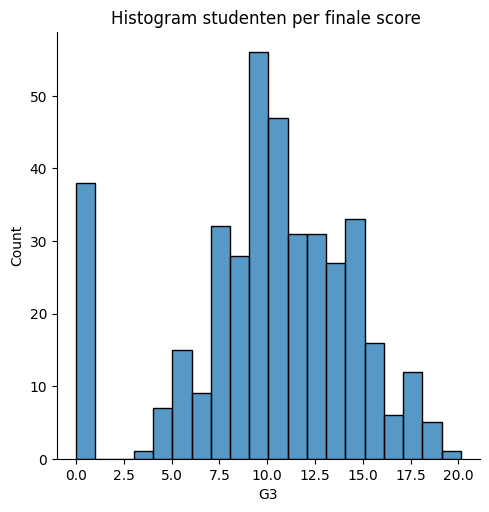

In [14]:
max_score = df.G3.max()
min_score = df.G3.min()
klassenbreedte = (max_score - min_score) / np.sqrt(df.G3.count())
print(klassenbreedte)
klassen = np.arange(start=min_score, stop=max_score+round(klassenbreedte), step=klassenbreedte)
sns.displot(data=df.G3,bins=klassen,kde=False)
plt.title("Histogram studenten per finale score ")

Bereken nu de centrummaten en spreidingsmaten van de finale score (G3). Bepaal met andere woorden:
- Het gemiddelde - mean()
- De mediaan - median()
- Variantie - var()
- Standaardafwijking - std()
- De range - max() - min()
- Q1 en Q3 en bereken hieruit de interkwartielafstand: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html
- De scheefheid - skew()
- De kurtosis - kurt()

Reflecteren deze centrummaten en spreidingsmaten wat je afleest op het histogram? Kijk dan vooral naar het gemiddelde, standaardafwijking en scheefheid

In [15]:
gemiddelde = df.G3.mean()
print(f"Het gemiddelde van de scores is {gemiddelde:.2f}")
mediaan = df.G3.median()
print(f"De mediaan van de scores is {mediaan:.2f}")
variantie = df.G3.var()
print(f" De variantie van de scores is {variantie:.2f}")
standaardafwijking = df.G3.std()
print(f"De standaardafwijking van de scores is {standaardafwijking:.2f}")
gemiddelde = df.G3.mean()
q1 = df.G3.quantile(0.25)
print(f"De eerste kwartiel van de scores is {q1}")
q3 = df.G3.quantile(0.75)
print(f"De derde kwartiel van de scores is {q3}")

interkwartielafstand = q3 - q1
print(f"De interkwartielafstand van de scores is {interkwartielafstand}")
scheefheid = df.G3.skew()
print(f"De scheefheid van de scores is {scheefheid}")
kurtosis = df.G3.kurt()
print(f"De kurtosis van de scores is {kurtosis}")



Het gemiddelde van de scores is 10.42
De mediaan van de scores is 11.00
 De variantie van de scores is 20.99
De standaardafwijking van de scores is 4.58
De eerste kwartiel van de scores is 8.0
De derde kwartiel van de scores is 14.0
De interkwartielafstand van de scores is 6.0
De scheefheid van de scores is -0.7326723530443435
De kurtosis van de scores is 0.4034208131242458


Maak een boxplot van de finale score, zijn er uitschieters aanwezig in de dataset?

Text(0.5, 1.0, 'Boxplot van de finale score')

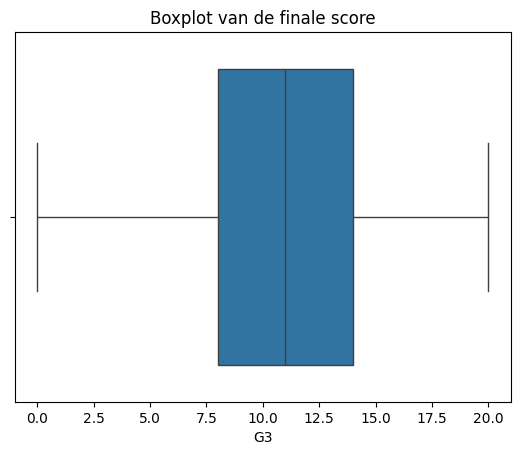

In [17]:
sns.boxplot(data=df,x='G3',whis=1.5)
plt.title("Boxplot van de finale score")

Iemand beweert dat personen in een relatie slechter scoren op de finale test dan iemand die single is. Klopt deze bewering? Gebruik de boxplot om je antwoord te staven

Text(0.5, 1.0, 'Boxplot van de Finale score vs relatiestatus')

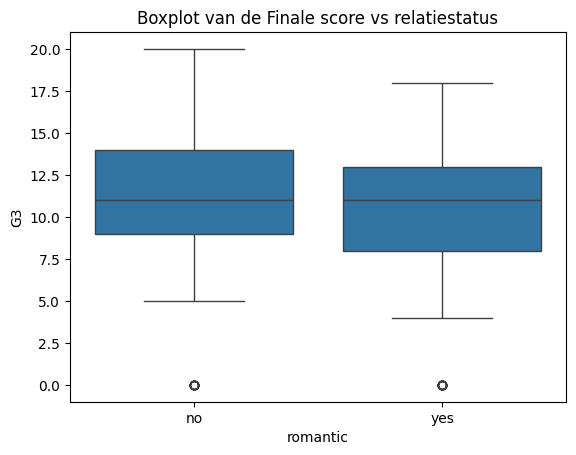

In [20]:

sns.boxplot(data=df, x='romantic', y='G3', whis=1.5)
plt.title("Boxplot van de Finale score vs relatiestatus")

Dezelfde persoon beweert ook dat studenten die verder willen studeren beter scoren dan studenten die dit niet willen. Klopt deze bewering?  </br>  Gebruik de centrummaten en spreidingsmaten alsook de boxplot om je antwoord te argumenteren.

Text(0.5, 1.0, 'Boxplot van de Finale score als de student verder wil studeren of niet')

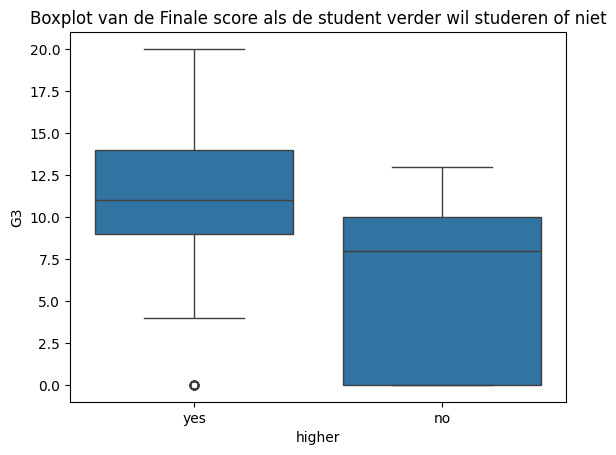

In [21]:

sns.boxplot(data=df,x='higher',y='G3',whis=1.5)
plt.title("Boxplot van de Finale score als de student verder wil studeren of niet")

Bepaal de uitschieters bij de punten van het 2de semester(G2). Haalden studenten extreem hoge of lage punten?
Bereken de uitschieters op twee mogelijke manieren:
1. Via de interkwartielafstand: uitschieters zijn waarden die groter zijn dan Q3 + 1,5 keer de interkwartielafstand of kleiner zijn dan Q1- 1,5 keer de interkwartielafstand.
2. Via de standaardafwijking: waarden die meer dan 3 standaardafwijken van het gemiddelde gelegen zijn. Dus waarden groter dan gemiddelde + 3 keer de std.afw en waarden kleiner dan het gemiddelde - 3 keer de standaardafwijking.

De bovengrens is 19.0 en de ondergrens is 3.0
 Het maximum is 19 en het minimum is 0
De bovengrens is 21.998438029301013 en de ondergrens is -0.57058992803519
Boxplot punten van het tweede semester zijn


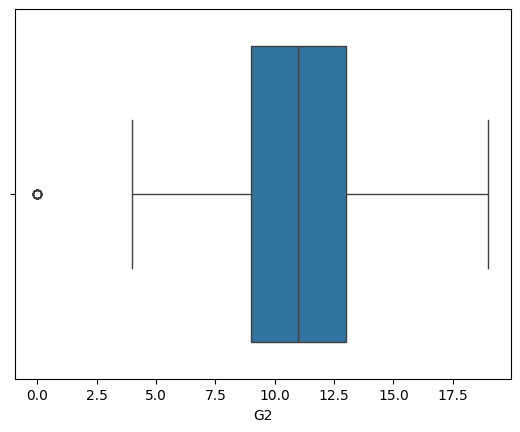

In [22]:
q3_g2 = df.G2.quantile(0.75)
q1_g2 = df.G2.quantile(0.25)
interkwartielafstand_g2 = q3_g2 - q1_g2
bovengrens = q3_g2 + 1.5 * interkwartielafstand_g2
ondergrens = q1_g2 - 1.5 * interkwartielafstand_g2
print(f"De bovengrens is {bovengrens} en de ondergrens is {ondergrens}")
print(f" Het maximum is {df.G2.max()} en het minimum is {df.G2.min()}")
standaardafwijking_g2 = df.G2.std()
gemiddelde_g2 = df.G2.mean()
bovengrens_standaardafwijking = gemiddelde_g2 + 3 * standaardafwijking_g2
ondergrens_standaardafwijking = gemiddelde_g2 - 3 * standaardafwijking_g2
print(f"De bovengrens is {bovengrens_standaardafwijking} en de ondergrens is {ondergrens_standaardafwijking}")
sns.boxplot(data=df,x='G2',whis=1.5)
print("Boxplot punten van het tweede semester zijn")
